In [47]:
## Some imports might be redundant because the code was split up into pieces
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from operator import itemgetter
from itertools import groupby
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier


In [5]:
def print_scores(y_predict, y_true):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(y_predict)):
        if y_true[i]==1 and y_predict[i]==1:
            TP += 1
        if y_true[i]==0 and y_predict[i]==1:
            FP += 1
        if y_true[i]==1 and y_predict[i]==0:
            FN += 1
        if y_true[i]==0 and y_predict[i]==0:
            TN += 1
    print('TP: '+ str(TP))
    print('FP: '+ str(FP))
    print('FN: '+ str(FN))
    print('TN: '+ str(TN))

In [34]:
# Read the data in pandas
data = pd.read_csv("data_for_student_case.csv")
data['bookingdate'] =  pd.to_datetime(data['bookingdate'])
data['creationdate'] =  pd.to_datetime(data['creationdate'])

# Delete the refused transactions (but keep them for later use maybe)

refused_data = data.loc[data['simple_journal'] == "Refused", :]
dataset = data.loc[data['simple_journal'] != "Refused", :].copy()
dataset['bool_fraud'] = (dataset['simple_journal'] == "Chargeback").copy().astype(int)
dataset['bool_valid'] = (dataset['simple_journal'] == "Settled").copy().astype(int)

# Do some preprocessing for the ML algorithms
finalset = dataset.copy()
finalset['mail_id'] = finalset['mail_id'].str.replace('email','')
finalset['ip_id'] = finalset['ip_id'].str.replace('ip','')
finalset['card_id'] = finalset['card_id'].str.replace('card','')


## Transform the data into onehot vectors
targets_for_onehot = ['issuercountrycode', 'txvariantcode','currencycode', 'shoppercountrycode', 'shopperinteraction', 'cardverificationcodesupplied', 'cvcresponsecode']

new_df = pd.DataFrame([])

for target in targets_for_onehot:
    temp = pd.get_dummies(finalset[target])
    new_df = pd.concat([new_df, temp],axis=1)
    
new_df = pd.concat([new_df, finalset[['mail_id','ip_id','card_id','bin','amount']]], axis=1)
new_df = new_df.fillna(0)

## Get the features and labels
x = new_df.values
x[x=="NA"] = 0
x = x.astype(float)
y = finalset['bool_fraud'].values

In [35]:
## Get the necessary library
!pip3 install imblearn

In [36]:
from imblearn.over_sampling import SMOTE

## Create a SMOTE object
sm = SMOTE()

In [37]:
## Make a split on the train/test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)
x_train_smoted, y_train_smoted = sm.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.5955732026695952


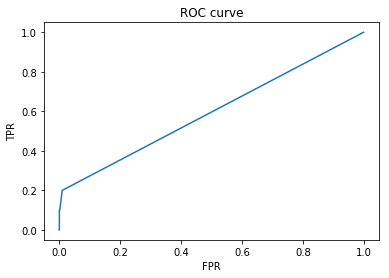

In [51]:
# Run the Random Forest classifier
clf = RandomForestClassifier(n_estimators = ).fit(x_train, y_train)

trained_clf = clf.fit(x_train, y_train)

predictions = trained_clf.predict_proba(x_test)

print(roc_auc_score(y_test, predictions[:,1]))

fpr, tpr, _ = roc_curve(y_test, predictions[:,1])

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [52]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()